I want to recreate the plot given me by Vanessa on the introduction page for my master thesis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

def find_repo_root(marker="README.md"):
    """Walk up from current path to find the repo root containing `marker`."""
    current = Path().resolve()
    for parent in [current] + list(current.parents):
        if (parent / marker).exists():
            return parent
    raise FileNotFoundError(f"Could not find repo root with marker '{marker}'")

# Find repo root using a known file at the root
repo_root = find_repo_root("README.md")

# Path to the CSV file
GFOC_path = repo_root / Path('Dataset/Dataset_MSc/GFOC_RDCDFI.csv')

# Load the GFOC data more efficiently
GFOC_data = pd.read_csv(GFOC_path, low_memory=True)

Download Catalogues

In [2]:
import pandas as pd

# Paths to Catalogues
shock_path = repo_root / Path('Dataset/Dataset_IPshocks/shocks_GFOC.csv')
helio_path = repo_root / Path('Dataset/Dataset_ICMECAT/helio4cast_icmecat_GFOC.csv')
RC_path = repo_root / Path('Dataset/Dataset_ICMECAT/RC_icmecat_GFOC.csv')

# import the data
Shock = pd.read_csv(shock_path)
Helio = pd.read_csv(helio_path)
RC = pd.read_csv(RC_path)


Select relevant features

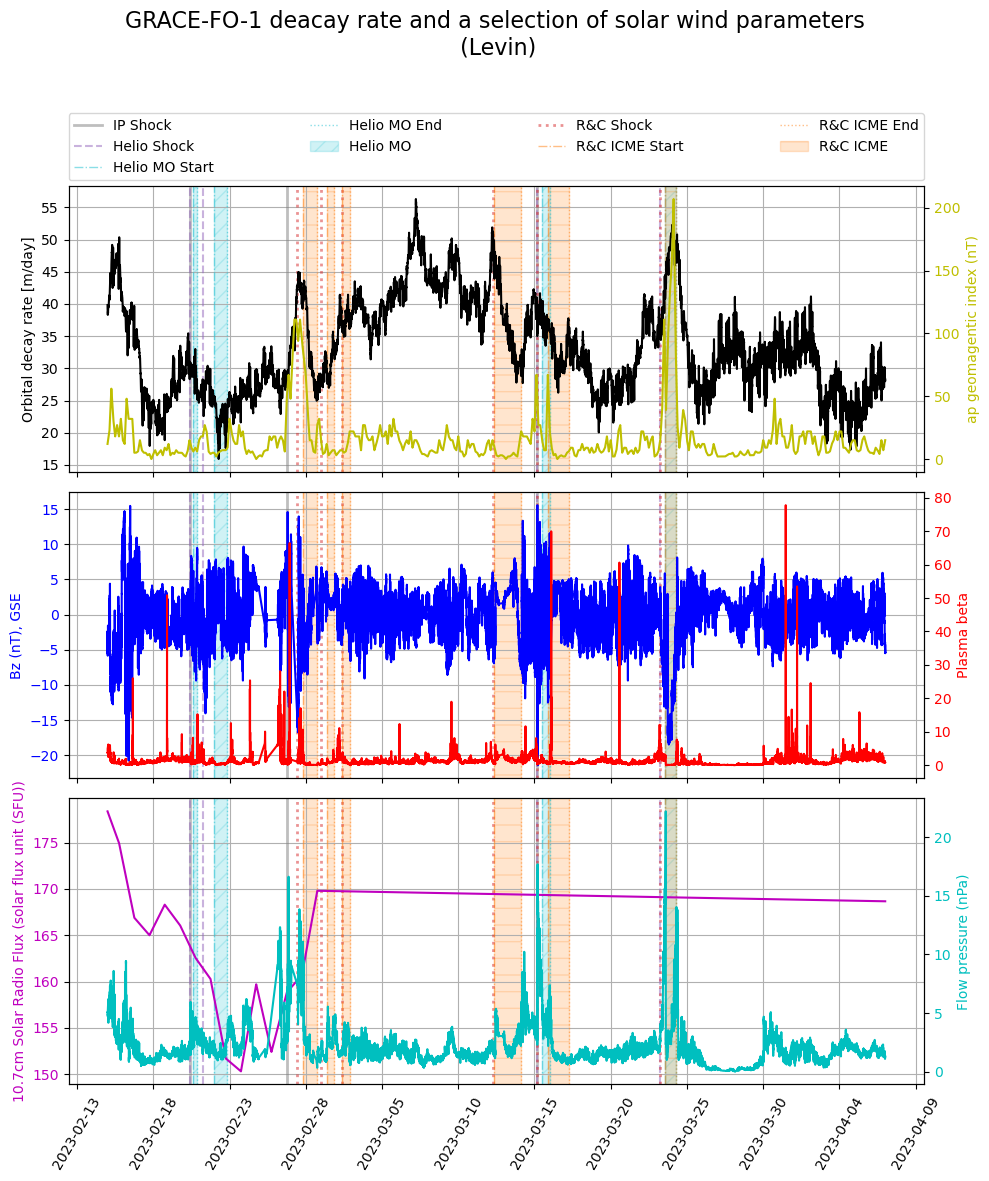

In [3]:
import matplotlib.dates as mdates
import numpy as np

# =========================== Input ===================================
start_date = '2023-02-15 00:00:00'
end_date = '2023-04-07 00:00:00'
# start_date = GFOC_data['time'].values[0]
# end_date = GFOC_data['time'].values[-1]

# add flags?
FLAG = True

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'daily'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 5  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================


GFOC_subset = GFOC_data[(GFOC_data['time'] >= start_date) & (GFOC_data['time'] <= end_date)]
# Time conversion
GFOC_time = GFOC_subset['time']
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)


# Create a figure with three subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 12), sharex =True)

# flags
if FLAG:

    # only data times that is in the range of the GFOC data
    Shock_GFOC = Shock[pd.to_datetime(Shock['Time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Shock_GFOC = Shock_GFOC[pd.to_datetime(Shock_GFOC['Time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    Helio_GFOC = Helio[pd.to_datetime(Helio['mo_end_time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Helio_GFOC = Helio_GFOC[pd.to_datetime(Helio_GFOC['icme_start_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    RC_GFOC = RC[pd.to_datetime(RC['ICME_End'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    RC_GFOC = RC_GFOC[pd.to_datetime(RC_GFOC['Disturbance_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]

    # flags
    Shock_flag_GFOC = pd.to_datetime(Shock_GFOC['Time'])
    Helios_shock_flag_GFOC = pd.to_datetime(Helio_GFOC['icme_start_time'])
    Helios_mostart_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_start_time'])
    Helios_moend_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_end_time'])
    RC_shock_flag_GFOC = pd.to_datetime(RC_GFOC['Disturbance_time'])
    RC_start_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_Start'])
    RC_end_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_End'])

    for ax in axs:
        # IP Shock flags
        for t in Shock_flag_GFOC:
            ax.axvline(t, color='tab:gray', alpha=0.5, linestyle='-', linewidth=2, label='IP Shock')
        
        # Helio Shock flags
        for t in Helios_shock_flag_GFOC:
            ax.axvline(t, color='tab:purple', alpha=0.5, linestyle='--', linewidth=1.5, label='Helio Shock')

        # Helios MO flags
        for tstart, tend in zip(Helios_mostart_flag_GFOC, Helios_moend_flag_GFOC):
            ax.axvline(tstart, color='tab:cyan', alpha=0.5, linestyle='-.', linewidth=1.0, label='Helio MO Start')
            ax.axvline(tend, color='tab:cyan', alpha=0.5, linestyle=':', linewidth=1.0, label='Helio MO End')
            ax.axvspan(tstart, tend, color='tab:cyan', alpha=0.2, hatch = '//', label='Helio MO')
        
        # RC Shock flags
        for t in RC_shock_flag_GFOC:
            ax.axvline(t, color='tab:red', alpha=0.5, linestyle=':', linewidth=2.0, label='R&C Shock')

        # RC flags
        for tstart, tend in zip(RC_start_flag_GFOC, RC_end_flag_GFOC):
            ax.axvline(tstart, color='tab:orange', alpha=0.5, linestyle='-.', linewidth=1.0, label='R&C ICME Start')
            ax.axvline(tend, color='tab:orange', alpha=0.5, linestyle=':', linewidth=1.0, label='R&C ICME End')
            ax.axvspan(tstart, tend, color='tab:orange', alpha=0.2, hatch = '-', label='R&C ICME')


    handles, labels = axs[0].get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    axs[0].legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left', ncol=4, mode="expand", borderaxespad=0.)

# first figure
axs[0].plot(GFOC_time, GFOC_subset['orbital_decay'], 'k')
axs[0].set_ylabel('Orbital decay rate [m/day]', color = 'k')
axs[0].grid()
axs[0].tick_params(axis='y', labelcolor='k')
ax1 = axs[0].twinx()
ax1.plot(GFOC_time, GFOC_subset['ap (LASP)'], 'y')
ax1.set_ylabel('ap geomagentic index (nT)', color='y')
ax1.tick_params(axis='y', labelcolor='y')

# second figure
axs[1].plot(GFOC_time, GFOC_subset['Bz GSE'], 'b')
axs[1].set_ylabel('Bz (nT), GSE', color = 'b')
axs[1].grid()
axs[1].tick_params(axis='y', labelcolor='b')
ax2 = axs[1].twinx()
ax2.plot(GFOC_time, GFOC_subset['Plasma beta'], 'r')
ax2.set_ylabel('Plasma beta', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# third figures
axs[2].plot(GFOC_time, GFOC_subset['F10.7 (LASP)'], 'm')
axs[2].set_ylabel('10.7cm Solar Radio Flux (solar flux unit (SFU))', color='m')
axs[2].grid()
axs[2].tick_params(axis='y', labelcolor='m')
format_ticks(axs[2], tick_interval, tick_step)
ax2 = axs[2].twinx()
ax2.plot(GFOC_time, GFOC_subset['Flow pressure (nPa)'], 'c')
ax2.set_ylabel('Flow pressure (nPa)', color='c')
ax2.tick_params(axis='y', labelcolor='c')

# Set the figure title
fig.suptitle('GRACE-FO-1 deacay rate and a selection of solar wind parameters\n (Levin)', fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

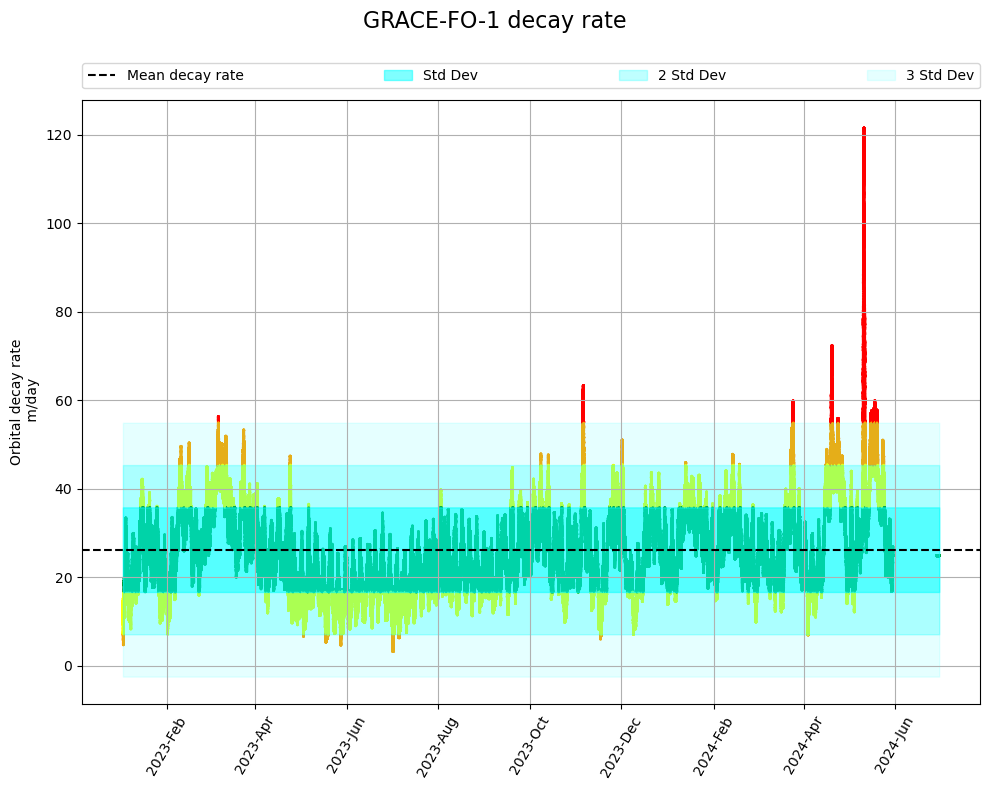

In [4]:
import matplotlib.dates as mdates

# =========================== Input ===================================
# start_date = '2024-05-12 00:00:00'
# end_date = '2024-06-30 11:00:00'
start_date = GFOC_data['time'].values[0]
end_date = GFOC_data['time'].values[-1]

# add flags?
FLAG = False

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'monthly'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================

GFOC_subset = GFOC_data[(GFOC_data['time'] >= start_date) & (GFOC_data['time'] <= end_date)]
# Time conversion
GFOC_time = GFOC_subset['time']
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# flags
if FLAG:
    # only data times that is in the range of the GFOC data
    Shock_GFOC = Shock[pd.to_datetime(Shock['Time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Shock_GFOC = Shock_GFOC[pd.to_datetime(Shock_GFOC['Time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    Helio_GFOC = Helio[pd.to_datetime(Helio['mo_end_time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Helio_GFOC = Helio_GFOC[pd.to_datetime(Helio_GFOC['icme_start_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    RC_GFOC = RC[pd.to_datetime(RC['ICME_End'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    RC_GFOC = RC_GFOC[pd.to_datetime(RC_GFOC['Disturbance_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]

    Shock_flag_GFOC = pd.to_datetime(Shock_GFOC['Time'])
    Helios_shock_flag_GFOC = pd.to_datetime(Helio_GFOC['icme_start_time'])
    Helios_mostart_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_start_time'])
    Helios_moend_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_end_time'])
    RC_shock_flag_GFOC = pd.to_datetime(RC_GFOC['Disturbance_time'])
    RC_start_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_Start'])
    RC_end_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_End'])


# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

# flags
if FLAG:
    # IP Shock flags
    for t in Shock_flag_GFOC:
        ax1.axvline(t, color='tab:gray', alpha=0.5, linestyle='-', linewidth=2, label='IP Shock')
        
    # Helio Shock flags
    for t in Helios_shock_flag_GFOC:
        ax1.axvline(t, color='tab:purple', alpha=0.5, linestyle='--', linewidth=1.5, label='Helio Shock')

    # Helios MO flags
    for tstart, tend in zip(Helios_mostart_flag_GFOC, Helios_moend_flag_GFOC):
        ax1.axvline(tstart, color='tab:cyan', alpha=0.5, linestyle='-.', linewidth=1.0, label='Helio MO Start')
        ax1.axvline(tend, color='tab:cyan', alpha=0.5, linestyle=':', linewidth=1.0, label='Helio MO End')
        ax1.axvspan(tstart, tend, color='tab:cyan', alpha=0.2, hatch = '//', label='Helio MO')

    # RC Shock flags
    for t in RC_shock_flag_GFOC:
        ax1.axvline(t, color='tab:red', alpha=0.5, linestyle=':', linewidth=2.0, label='R&C Shock')

    # RC flags
    for tstart, tend in zip(RC_start_flag_GFOC, RC_end_flag_GFOC):
        ax1.axvline(tstart, color='tab:orange', alpha=0.5, linestyle='-.', linewidth=1.0, label='R&C ICME Start')
        ax1.axvline(tend, color='tab:orange', alpha=0.5, linestyle=':', linewidth=1.0, label='R&C ICME End')
        ax1.axvspan(tstart, tend, color='tab:orange', alpha=0.2, hatch = '-', label='R&C ICME')


# Plot the unresolved, trend, and mean altitude data
# ax1.plot(GFOC_time, GFOC_data['orbital_decay'][start:end], 'k', label='Orbital decay rate')
mean = GFOC_subset['orbital_decay'].mean()
std = GFOC_subset['orbital_decay'].std()
values = GFOC_subset['orbital_decay']
colors = []
for v in values:
    if abs(v - mean) <= std:
        colors.append('green')
    elif abs(v - mean) <= 2 * std:
        colors.append('yellow')
    elif abs(v - mean) <= 3 * std:
        colors.append('orange')
    else:
        colors.append('red')
ax1.scatter(GFOC_time, values, c=colors, s=1)
ax1.axhline(mean, color='k', linestyle='--', label='Mean decay rate')
ax1.fill_between(GFOC_time, mean - std, mean + std, color='cyan', alpha=0.5, label='Std Dev')
ax1.fill_between(GFOC_time, mean - 2*std, mean + 2*std, color='cyan', alpha=0.25, label='2 Std Dev')
ax1.fill_between(GFOC_time, mean - 3*std, mean + 3*std, color='cyan', alpha=0.1, label='3 Std Dev')
# ax1.plot(GFOC_time, GFOC_data['trend'][start:end] / 1000 - 6378.137, 'r', label='Trend')
# ax1.plot(GFOC_time, GFOC_data['mean_altitude'][start:end], 'y--', label='Mean Altitude')

# Set labels and grid
ax1.set_ylabel('Orbital decay rate\n m/day', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
handles, labels = ax1.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax1.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncols=4, mode="expand", borderaxespad=0.)

# Set the figure title
fig.suptitle('GRACE-FO-1 decay rate', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit the title

# Show the plot
plt.show()

Test different subsets of the whole timespan

In [5]:
# Time conversion
GFOC_time = GFOC_data['time']
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

n = 10  # Number of subsets (change as needed)
subset_size = len(GFOC_data['orbital_decay']) // n
means = []
stds = []

for i in range(n):
    start_idx = i * subset_size
    # Make sure the last subset includes any remaining data
    end_idx = (i + 1) * subset_size if i < n - 1 else len(GFOC_data['orbital_decay'])
    subset = GFOC_data['orbital_decay'].iloc[start_idx:end_idx]
    means.append(subset.mean())
    stds.append(subset.std())

print("Means:", means)
print("Stds:", stds)

# Calculate number of days between date at index 0 and date at index subset_size
days_between = (GFOC_time.iloc[subset_size] - GFOC_time.iloc[0]).days
print("Number of days between index 0 and index subset_size:", days_between)


Means: [np.float64(25.480042527167345), np.float64(32.217326315307396), np.float64(19.493720459610852), np.float64(18.291513806463), np.float64(22.203194326596584), np.float64(27.989542356935132), np.float64(25.39173035005339), np.float64(29.879174062093), np.float64(24.94886375886235), np.float64(36.43088237829479)]
Stds: [7.7218113827115085, 7.755703239131564, 6.453380116691698, 4.56304539315887, 4.523807541782563, 7.26971858127516, 8.14148155143635, 6.240921574205885, 7.511742220313234, 14.611861336202631]
Number of days between index 0 and index subset_size: 51


Plot the different subsets

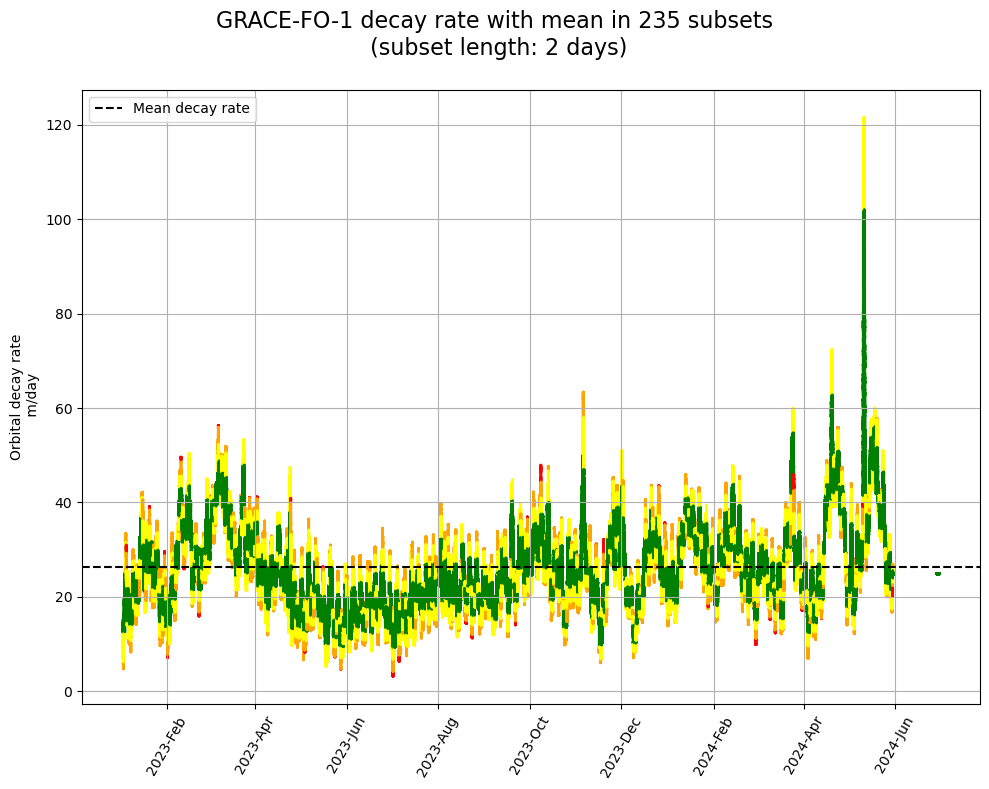

In [62]:
import matplotlib.dates as mdates

# =========================== Input ===================================
# start_date = '2024-05-12 00:00:00'
# end_date = '2024-06-30 11:00:00'
start_date = GFOC_data['time'].values[0]
end_date = GFOC_data['time'].values[-1]

# add flags?
FLAG = False

# Add an option for monthly, daily, or hourly ticks
tick_interval = 'monthly'  # Change to 'monthly', 'daily', or 'hourly'
tick_step = 2  # Step for the ticks (e.g., every month =1, every 2 months = 2, etc)

# =====================================================================

GFOC_subset = GFOC_data[(GFOC_data['time'] >= start_date) & (GFOC_data['time'] <= end_date)]
# Time conversion
GFOC_time = GFOC_subset['time']
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

# Helper function for tick formatting
def format_ticks(ax, tick_interval, tick_step):
    if tick_interval == 'monthly':
        ax.xaxis.set_major_locator(mdates.MonthLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))                         
    elif tick_interval == 'daily':
        ax.xaxis.set_major_locator(mdates.DayLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    elif tick_interval == 'hourly':
        ax.xaxis.set_major_locator(mdates.HourLocator(interval=tick_step))
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
    ax.tick_params(axis='x', rotation=60)

# flags
if FLAG:
    # only data times that is in the range of the GFOC data
    Shock_GFOC = Shock[pd.to_datetime(Shock['Time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Shock_GFOC = Shock_GFOC[pd.to_datetime(Shock_GFOC['Time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    Helio_GFOC = Helio[pd.to_datetime(Helio['mo_end_time'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    Helio_GFOC = Helio_GFOC[pd.to_datetime(Helio_GFOC['icme_start_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]
    RC_GFOC = RC[pd.to_datetime(RC['ICME_End'], format='%Y-%m-%d %H:%M:%S') >= pd.to_datetime(start_date)]
    RC_GFOC = RC_GFOC[pd.to_datetime(RC_GFOC['Disturbance_time'], format='%Y-%m-%d %H:%M:%S') <= pd.to_datetime(end_date)]

    Shock_flag_GFOC = pd.to_datetime(Shock_GFOC['Time'])
    Helios_shock_flag_GFOC = pd.to_datetime(Helio_GFOC['icme_start_time'])
    Helios_mostart_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_start_time'])
    Helios_moend_flag_GFOC = pd.to_datetime(Helio_GFOC['mo_end_time'])
    RC_shock_flag_GFOC = pd.to_datetime(RC_GFOC['Disturbance_time'])
    RC_start_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_Start'])
    RC_end_flag_GFOC = pd.to_datetime(RC_GFOC['ICME_End'])


# Create a figure with three subplots
fig, ax1 = plt.subplots(1, 1, figsize=(10, 8))

# flags
if FLAG:
    # IP Shock flags
    for t in Shock_flag_GFOC:
        ax1.axvline(t, color='tab:gray', alpha=0.5, linestyle='-', linewidth=2, label='IP Shock')
        
    # Helio Shock flags
    for t in Helios_shock_flag_GFOC:
        ax1.axvline(t, color='tab:purple', alpha=0.5, linestyle='--', linewidth=1.5, label='Helio Shock')

    # Helios MO flags
    for tstart, tend in zip(Helios_mostart_flag_GFOC, Helios_moend_flag_GFOC):
        ax1.axvline(tstart, color='tab:cyan', alpha=0.5, linestyle='-.', linewidth=1.0, label='Helio MO Start')
        ax1.axvline(tend, color='tab:cyan', alpha=0.5, linestyle=':', linewidth=1.0, label='Helio MO End')
        ax1.axvspan(tstart, tend, color='tab:cyan', alpha=0.2, hatch = '//', label='Helio MO')

    # RC Shock flags
    for t in RC_shock_flag_GFOC:
        ax1.axvline(t, color='tab:red', alpha=0.5, linestyle=':', linewidth=2.0, label='R&C Shock')

    # RC flags
    for tstart, tend in zip(RC_start_flag_GFOC, RC_end_flag_GFOC):
        ax1.axvline(tstart, color='tab:orange', alpha=0.5, linestyle='-.', linewidth=1.0, label='R&C ICME Start')
        ax1.axvline(tend, color='tab:orange', alpha=0.5, linestyle=':', linewidth=1.0, label='R&C ICME End')
        ax1.axvspan(tstart, tend, color='tab:orange', alpha=0.2, hatch = '-', label='R&C ICME')


# Plot the unresolved, trend, and mean altitude data
# ax1.plot(GFOC_time, GFOC_data['orbital_decay'][start:end], 'k', label='Orbital decay rate')
values = GFOC_subset['orbital_decay']
colors = []

# n = 22  # Number of subsets (change as needed)
n = 235
subset_size = len(GFOC_subset['orbital_decay']) // n
means = []
stds = []

for i in range(n):
    start_idx = i * subset_size
    # Make sure the last subset includes any remaining data
    end_idx = (i + 1) * subset_size if i < n - 1 else len(GFOC_subset['orbital_decay'])
    subset = GFOC_subset['orbital_decay'].iloc[start_idx:end_idx]

    mean = subset.mean()
    std = subset.std()
    for v in values[start_idx:end_idx]:
        if abs(v - mean) <= std:
            colors.append('green')
        elif abs(v - mean) <= 2 * std:
            colors.append('yellow')
        elif abs(v - mean) <= 3 * std:
            colors.append('orange')
        else:
            colors.append('red')
    
    means.append(mean)
    stds.append(std)

ax1.scatter(GFOC_time, values, c=colors, s=1)
ax1.axhline(GFOC_subset['orbital_decay'].mean(), color='k', linestyle='--', label='Mean decay rate')

# Set labels and grid
ax1.set_ylabel('Orbital decay rate\n m/day', color='k')
ax1.tick_params(axis='y', labelcolor='k')
ax1.grid()

# Format ticks
format_ticks(ax1, tick_interval, tick_step)

# Add legend
if FLAG:
    handles, labels = ax1.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax1.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
            ncols=4, mode="expand", borderaxespad=0.)
else:
    ax1.legend(loc='upper left')

# Set the figure title
days_between = (GFOC_time.iloc[subset_size] - GFOC_time.iloc[0]).days
titletxt = 'GRACE-FO-1 decay rate with mean in '+str(n)+' subsets\n (subset length: '+str(days_between)+' days)'
fig.suptitle(titletxt, fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit the title
# Show the plot
plt.show()

Find Periods with Lombscargle

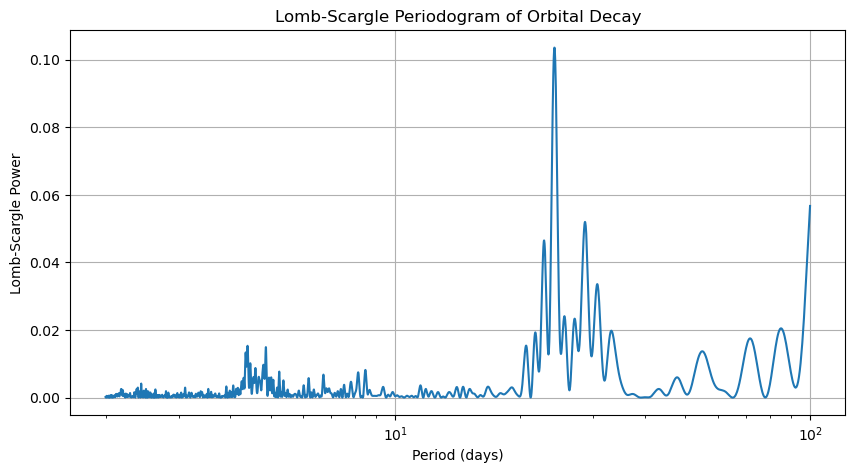

Strongest period: 24.18 days


In [7]:
from astropy.timeseries import LombScargle
import numpy as np

import matplotlib.pyplot as plt

# Convert time to numerical values (in days)
times = pd.to_datetime(GFOC_data['time'], format='%Y-%m-%d %H:%M:%S')
times_num = (times - times.iloc[0]).dt.total_seconds() / (24 * 3600)  # days since start

y = GFOC_data['orbital_decay'].values

# Define frequency grid (cycles per day)
min_period = 2    # days
max_period = 100  # days
frequency = np.linspace(1/max_period, 1/min_period, 10000)

# Compute Lomb-Scargle periodogram
ls = LombScargle(times_num, y)
power = ls.power(frequency)

# Find the period with the highest power
best_frequency = frequency[np.argmax(power)]
best_period = 1 / best_frequency

# Plot the periodogram
plt.figure(figsize=(10, 5))
plt.plot(1/frequency, power)
plt.xlabel('Period (days)')
plt.ylabel('Lomb-Scargle Power')
plt.title('Lomb-Scargle Periodogram of Orbital Decay')
plt.xscale('log')
plt.grid(True)
plt.show()

print(f"Strongest period: {best_period:.2f} days")

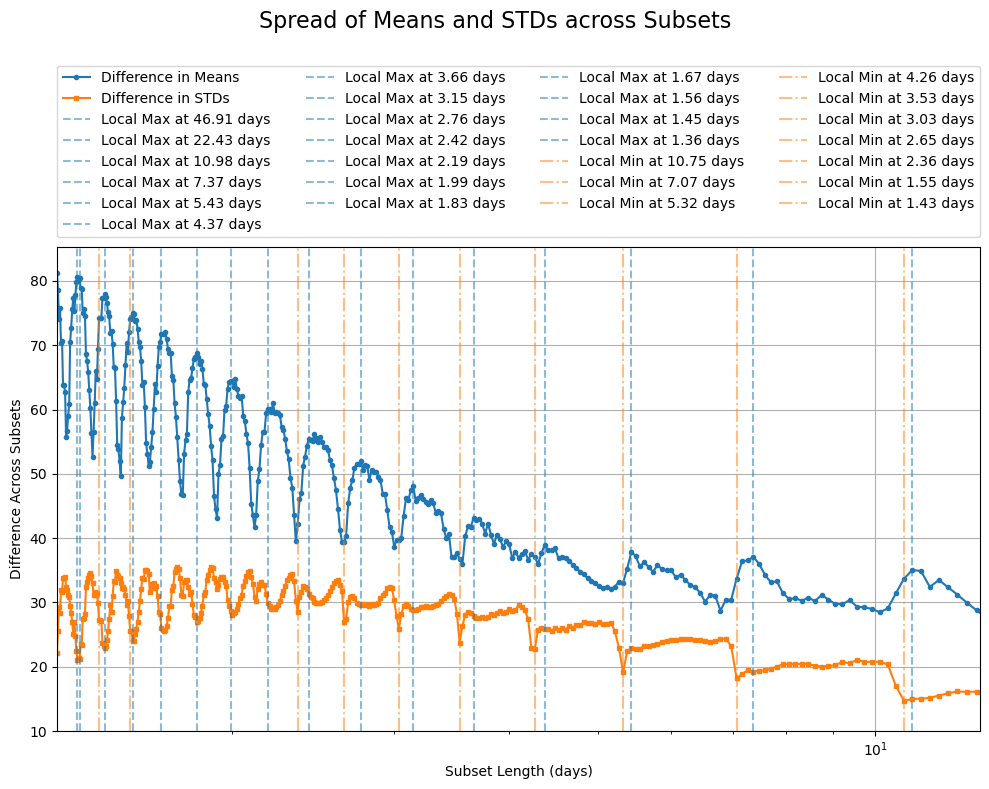

Times of local maxima in mean_diffs: [46.908680555555556, 22.434375, 10.978125, 7.370833333333334, 5.430902777777778, 4.372222222222222, 3.6590277777777778, 3.1458333333333335, 2.7586805555555554, 2.421875, 2.185763888888889, 1.9916666666666667, 1.8291666666666666, 1.6746527777777778, 1.5583333333333333, 1.453125, 1.3645833333333333, 1.3572916666666666]
Times of local minima in std_diffs: [10.749305555555555, 7.0680555555555555, 5.319097222222222, 4.263888888888889, 3.5336805555555557, 3.0347222222222223, 2.645486111111111, 2.3555555555555556, 1.5489583333333334, 1.4326388888888888]


In [60]:
# Time conversion
GFOC_time = GFOC_data['time']
GFOC_time = pd.to_datetime(GFOC_time, format='%Y-%m-%d %H:%M:%S')

orbital_decay = GFOC_data['orbital_decay']

n_values = range(1, 401)
mean_diffs = []
std_diffs = []
days_between = []

for n in n_values:
    subset_size = len(orbital_decay) // n
    means = []
    stds = []

    for i in range(n):
        start_idx = i * subset_size
        end_idx = (i + 1) * subset_size if i < n - 1 else len(orbital_decay)
        subset = orbital_decay.iloc[start_idx:end_idx]
        means.append(subset.mean())
        stds.append(subset.std())

    # Compute spread of means and stds across the subsets
    mean_diffs.append(max(means) - min(means))
    std_diffs.append(max(stds) - min(stds))
    days_between.append((GFOC_time.iloc[subset_size-1] - GFOC_time.iloc[0]).total_seconds() / 86400)

local_maxima_indices = []
local_maxima_values = []
local_minima_indices = []
local_minima_values = []

local_max = 10
local_min = 10
# Find local maxima and minima in mean_diffs
for j in range(len(mean_diffs)-5):
    if (mean_diffs[j] - np.min(mean_diffs[(j+2):(j+5)])) > 2.0 and mean_diffs[j] > local_max:
        if mean_diffs[j] > mean_diffs[j-1] and mean_diffs[j] > mean_diffs[j+1]: # local maxima condition
            local_max = mean_diffs[j]
            local_maxima_indices.append(j)
            local_maxima_values.append(local_max)
    
    if (std_diffs[j+2] - std_diffs[j]) > 4 and std_diffs[j] > 10:
        if std_diffs[j-1] > std_diffs[j] and std_diffs[j+1] > std_diffs[j]: #local minima condition
            local_minima_indices.append(j)
            local_minima_values.append(std_diffs[j])

# Plotting the variability
fig, ax = plt.subplots(figsize=(10, 8))

ax.plot(days_between, mean_diffs, label='Difference in Means', marker='o', ms = 3)
ax.plot(days_between, std_diffs, label='Difference in STDs', marker='s', ms = 3)
for i in local_maxima_indices:
    labeltxt = f"Local Max at {days_between[i]:.2f} days"
    ax.axvline(days_between[i], color='tab:blue', linestyle='--', alpha=0.5, linewidth=1.5, label = labeltxt)
for i in local_minima_indices:
    labeltxt = f"Local Min at {days_between[i]:.2f} days"
    ax.axvline(days_between[i], color='tab:orange', linestyle='-.', alpha=0.5, linewidth=1.5, label = labeltxt)
ax.set_xscale('log')
ax.set_xlabel('Subset Length (days)')
ax.set_ylabel('Difference Across Subsets')
ax.set_xlim(left=min(days_between), right=13)
ax.set_ylim(bottom = 10)

ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), bbox_to_anchor=(0., 1.02, 1., .102), loc='lower left',
           ncols=4, mode="expand", borderaxespad=0.)

# Set the figure title
fig.suptitle('Spread of Means and STDs across Subsets', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.98])  # Adjust layout to fit the title
plt.show()

print("Times of local maxima in mean_diffs:", [days_between[i] for i in local_maxima_indices])
print("Times of local minima in std_diffs:", [days_between[i] for i in local_minima_indices])

In [ ]:
from scipy.optimize import curve_fit

